In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import numpy as np

import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt

import analytic_formulas as af
import aux_data as aux

In [11]:
%matplotlib inline

input kwargs:  {'Lw': 'RY', 'Li': 'RY', 'rho_w': 'HS', 'D': 'HP', 'Ei': 'GG', 'Ew': 'GG'}


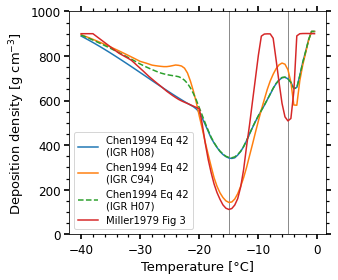

In [12]:
Ts = np.arange(-40,0,0.5)
params = dict(Lw='RY', Li='RY', rho_w='HS', D='HP', Ei='GG', Ew='GG')
f = af.get_factors(273.15+Ts, 1013.25e2, rh=100, **params)


fig, ax = plt.subplots(figsize=(4.8, 4))

ax.axvline(-5, color='grey', lw=0.9)
ax.axvline(-15, color='grey', lw=0.9)

igr_here = aux.get_igr(273.15+Ts, 'H08plan')
rho_exwv = (f.e0 - f.Ei)/(af.Rv*(273.15+Ts))
rho_dep = 0.91*np.exp(-3*(np.maximum(rho_exwv*1e3-0.05, 0))/igr_here)*1e3
ax.plot(Ts, rho_dep, label='Chen1994 Eq 42\n(IGR H08)')

igr_here = aux.get_igr(273.15+Ts, 'C94')
rho_exwv = (f.e0 - f.Ei)/(af.Rv*(273.15+Ts))
rho_dep = 0.91*np.exp(-3*(np.maximum(rho_exwv*1e3-0.05, 0))/igr_here)*1e3
ax.plot(Ts, rho_dep, label='Chen1994 Eq 42\n(IGR C94)')

igr_here = aux.get_igr(273.15+Ts, 'H07')
rho_exwv = (f.e0 - f.Ei)/(af.Rv*(273.15+Ts))
rho_dep = 0.91*np.exp(-3*(np.maximum(rho_exwv*1e3-0.05, 0))/igr_here)*1e3
ax.plot(Ts, rho_dep, '--', label='Chen1994 Eq 42\n(IGR H07)')

ax.plot(Ts, aux.get_rho_dep(273.15+Ts), label='Miller1979 Fig 3')


ax.set_ylim(0, 1000)
ax.set_ylabel('Deposition density [g cm$^{-3}$]', fontsize=13)

ax.set_xlabel('Temperature [°C]', fontsize=13)

ax.tick_params(axis='both', which='both', right=True, top=True)
ax.tick_params(axis='both', which='major', labelsize=12,
               width=1.7, length=5)
ax.tick_params(axis='both', which='minor', width=1.2, length=3)
ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.legend()

fig.tight_layout()
fig.savefig('plots/deposition_density.png', dpi=250)


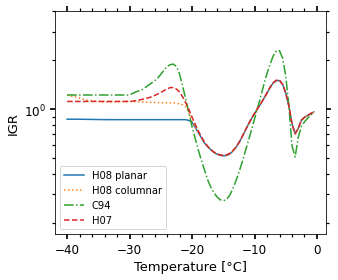

In [13]:
fig, ax = plt.subplots(figsize=(4.8, 4))

ax.plot(Ts, aux.get_igr(273.15+Ts, 'H08plan'), '-', label='H08 planar')

ax.plot(Ts, aux.get_igr(273.15+Ts, 'H08col'), ':', label='H08 columnar')

ax.plot(Ts, aux.get_igr(273.15+Ts, 'C94'), '-.', label='C94')
ax.plot(Ts, aux.get_igr(273.15+Ts, 'H07'), '--', label='H07')

ax.legend()

ax.set_yscale('log')
ax.set_ylim(1.7e-1, 4e0)

ax.set_ylabel('IGR', fontsize=13)

ax.set_xlabel('Temperature [°C]', fontsize=13)

ax.tick_params(axis='both', which='both', right=True, top=True)
ax.tick_params(axis='both', which='major', labelsize=12,
               width=1.7, length=5)
ax.tick_params(axis='both', which='minor', width=1.2, length=3)
ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.legend()

fig.tight_layout()
fig.savefig('plots/IGR.png', dpi=250)
